In [1]:
## Linear Regression


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle 
%matplotlib inline

In [7]:
data = pd.read_csv('Advertising.csv')

In [8]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.shape

(200, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<Axes: xlabel='newspaper', ylabel='sales'>

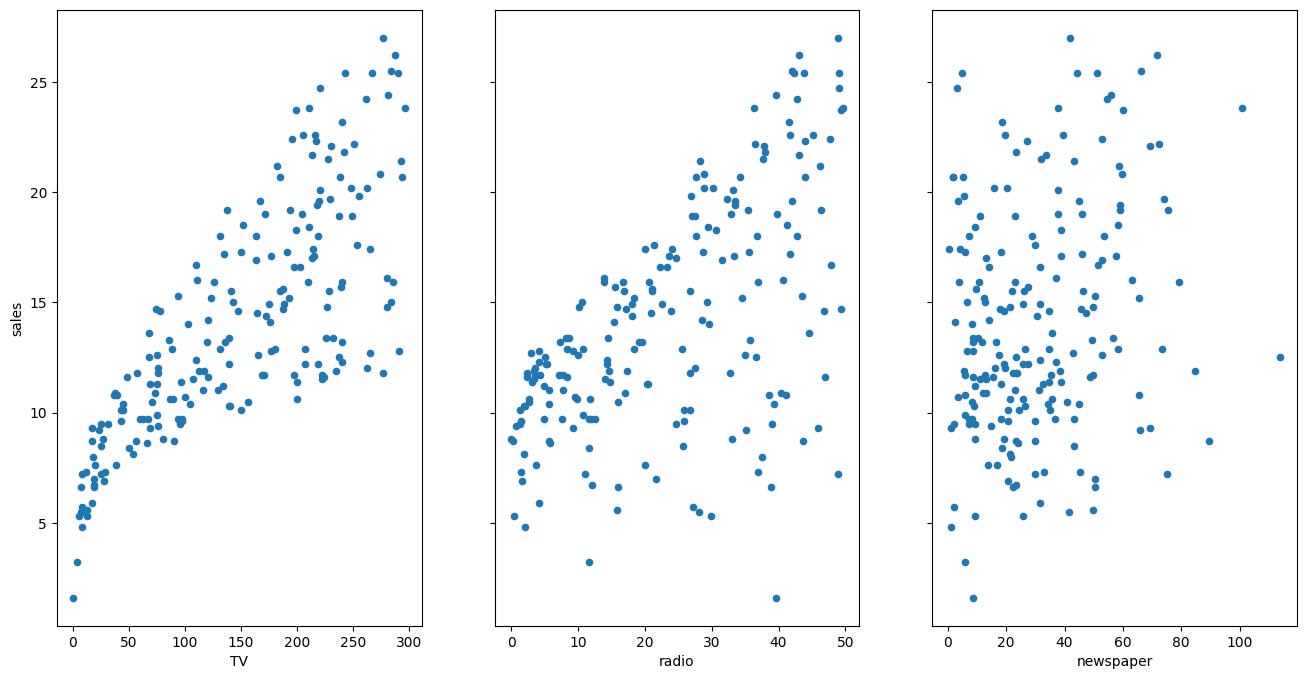

In [12]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [13]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [14]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

In [15]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [16]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

In [17]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [18]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

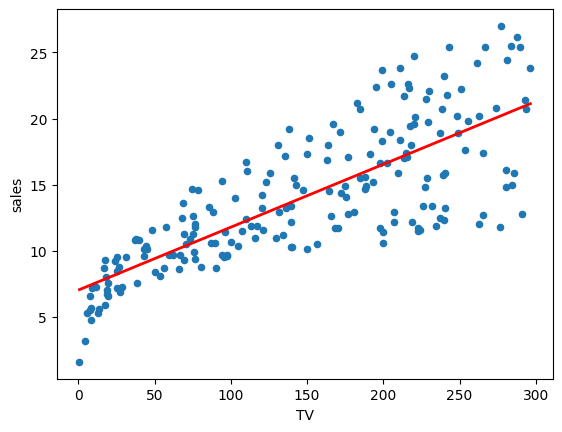

In [19]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [21]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [23]:
lm.rsquared

0.611875050850071

In [25]:
feature_cols = ['TV','radio','newspaper']
X=data[feature_cols]
y=data.sales

lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [26]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        01:38:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Feature Selection

## only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio',data=data).fit()
lm.rsquared

0.8971942610828956

In [28]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [29]:
# Handling Categorical Predictors with two categories

import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [30]:
data['IsLarge'] = data.Scale.map({'small':0,'large':1})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [31]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.04571982092436276
The Coefficient of  radio  is:  0.18872814313427852
The Coefficient of  newspaper  is:  -0.0010976794483515961
The Coefficient of  IsLarge  is:  0.05742385085482783


In [32]:
# Handing categorical variables with more than two categories

# set a  seed for reproducibility
np.random.seed(123456)
# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban


In [33]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,False,False
1,2,44.5,39.3,45.1,10.4,small,0,urban,False,True
2,3,17.2,45.9,69.3,9.3,small,0,rural,False,False
3,4,151.5,41.3,58.5,18.5,small,0,urban,False,True
4,5,180.8,10.8,58.4,12.9,large,1,suburban,True,False


In [34]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [40]:
## Python implementation


In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNetCV,ElasticNet,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

In [42]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [46]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [47]:
data['University Rating'].isnull().sum()

15

In [48]:
data['University Rating'].mode()

0    3.0
Name: University Rating, dtype: float64

In [49]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [50]:
data['TOEFL Score'].mean()

107.18775510204081

In [51]:
data['GRE Score'].mean()

316.55876288659795

In [54]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['University Rating'].mode()[0])

In [55]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [56]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [57]:
data['University Rating'].isnull().sum()

0

In [58]:
data['TOEFL Score'].isnull().sum()

0

In [59]:
data['GRE Score'].isnull().sum()

0

In [60]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,105.104000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,15.805214,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,3.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,102.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [61]:
data = data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


/tmp/ipykernel_1453/1055278822.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_1453/1055278822.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_1453/1055278822.py:8: UserWarning: 

`distplot` is a deprecated function and will be re

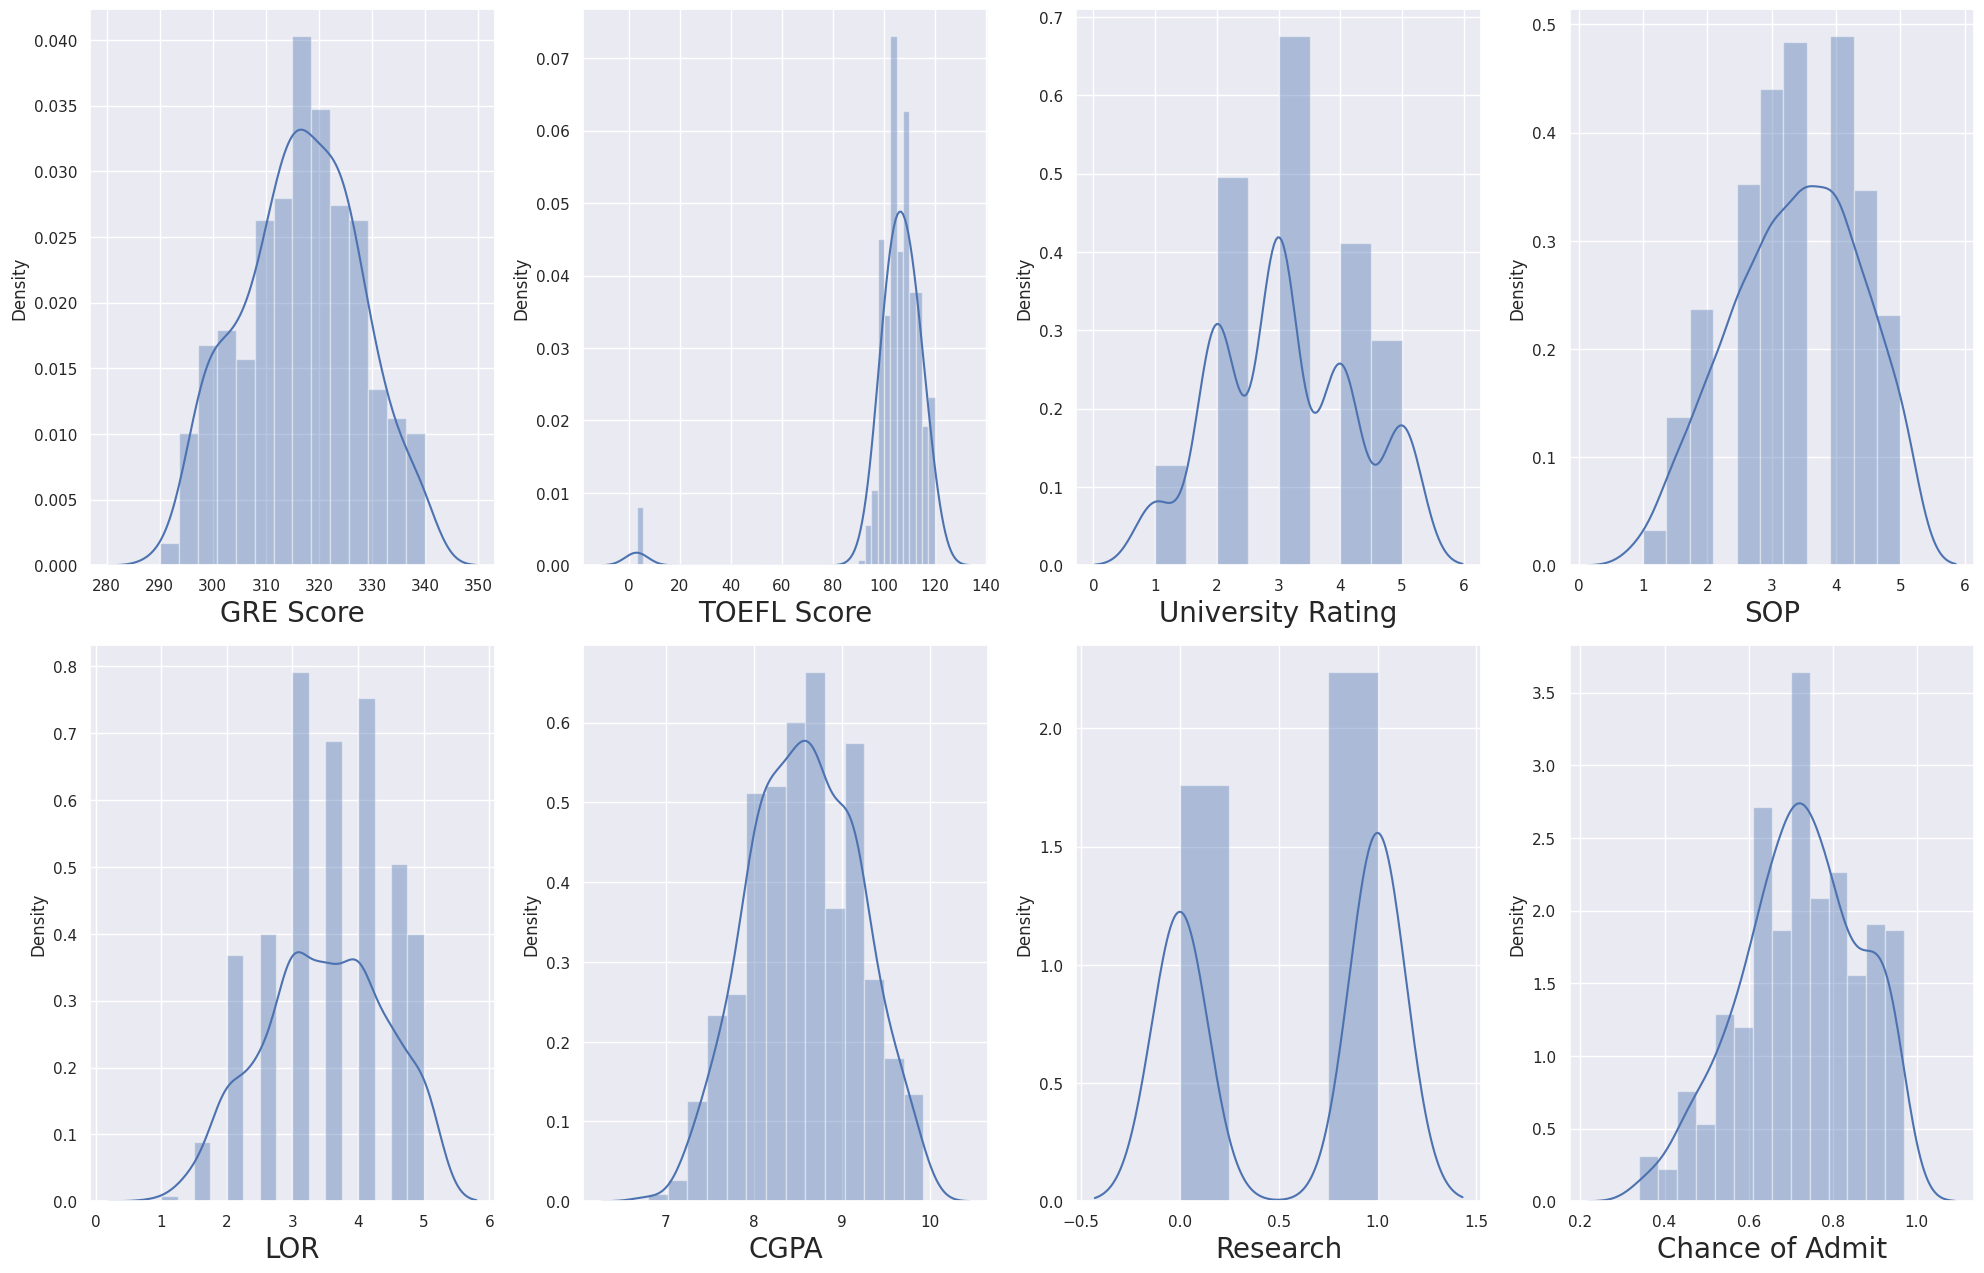

In [62]:
# this is how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [63]:
y = data['Chance of Admit']
X = data.drop(columns= ['Chance of Admit'])

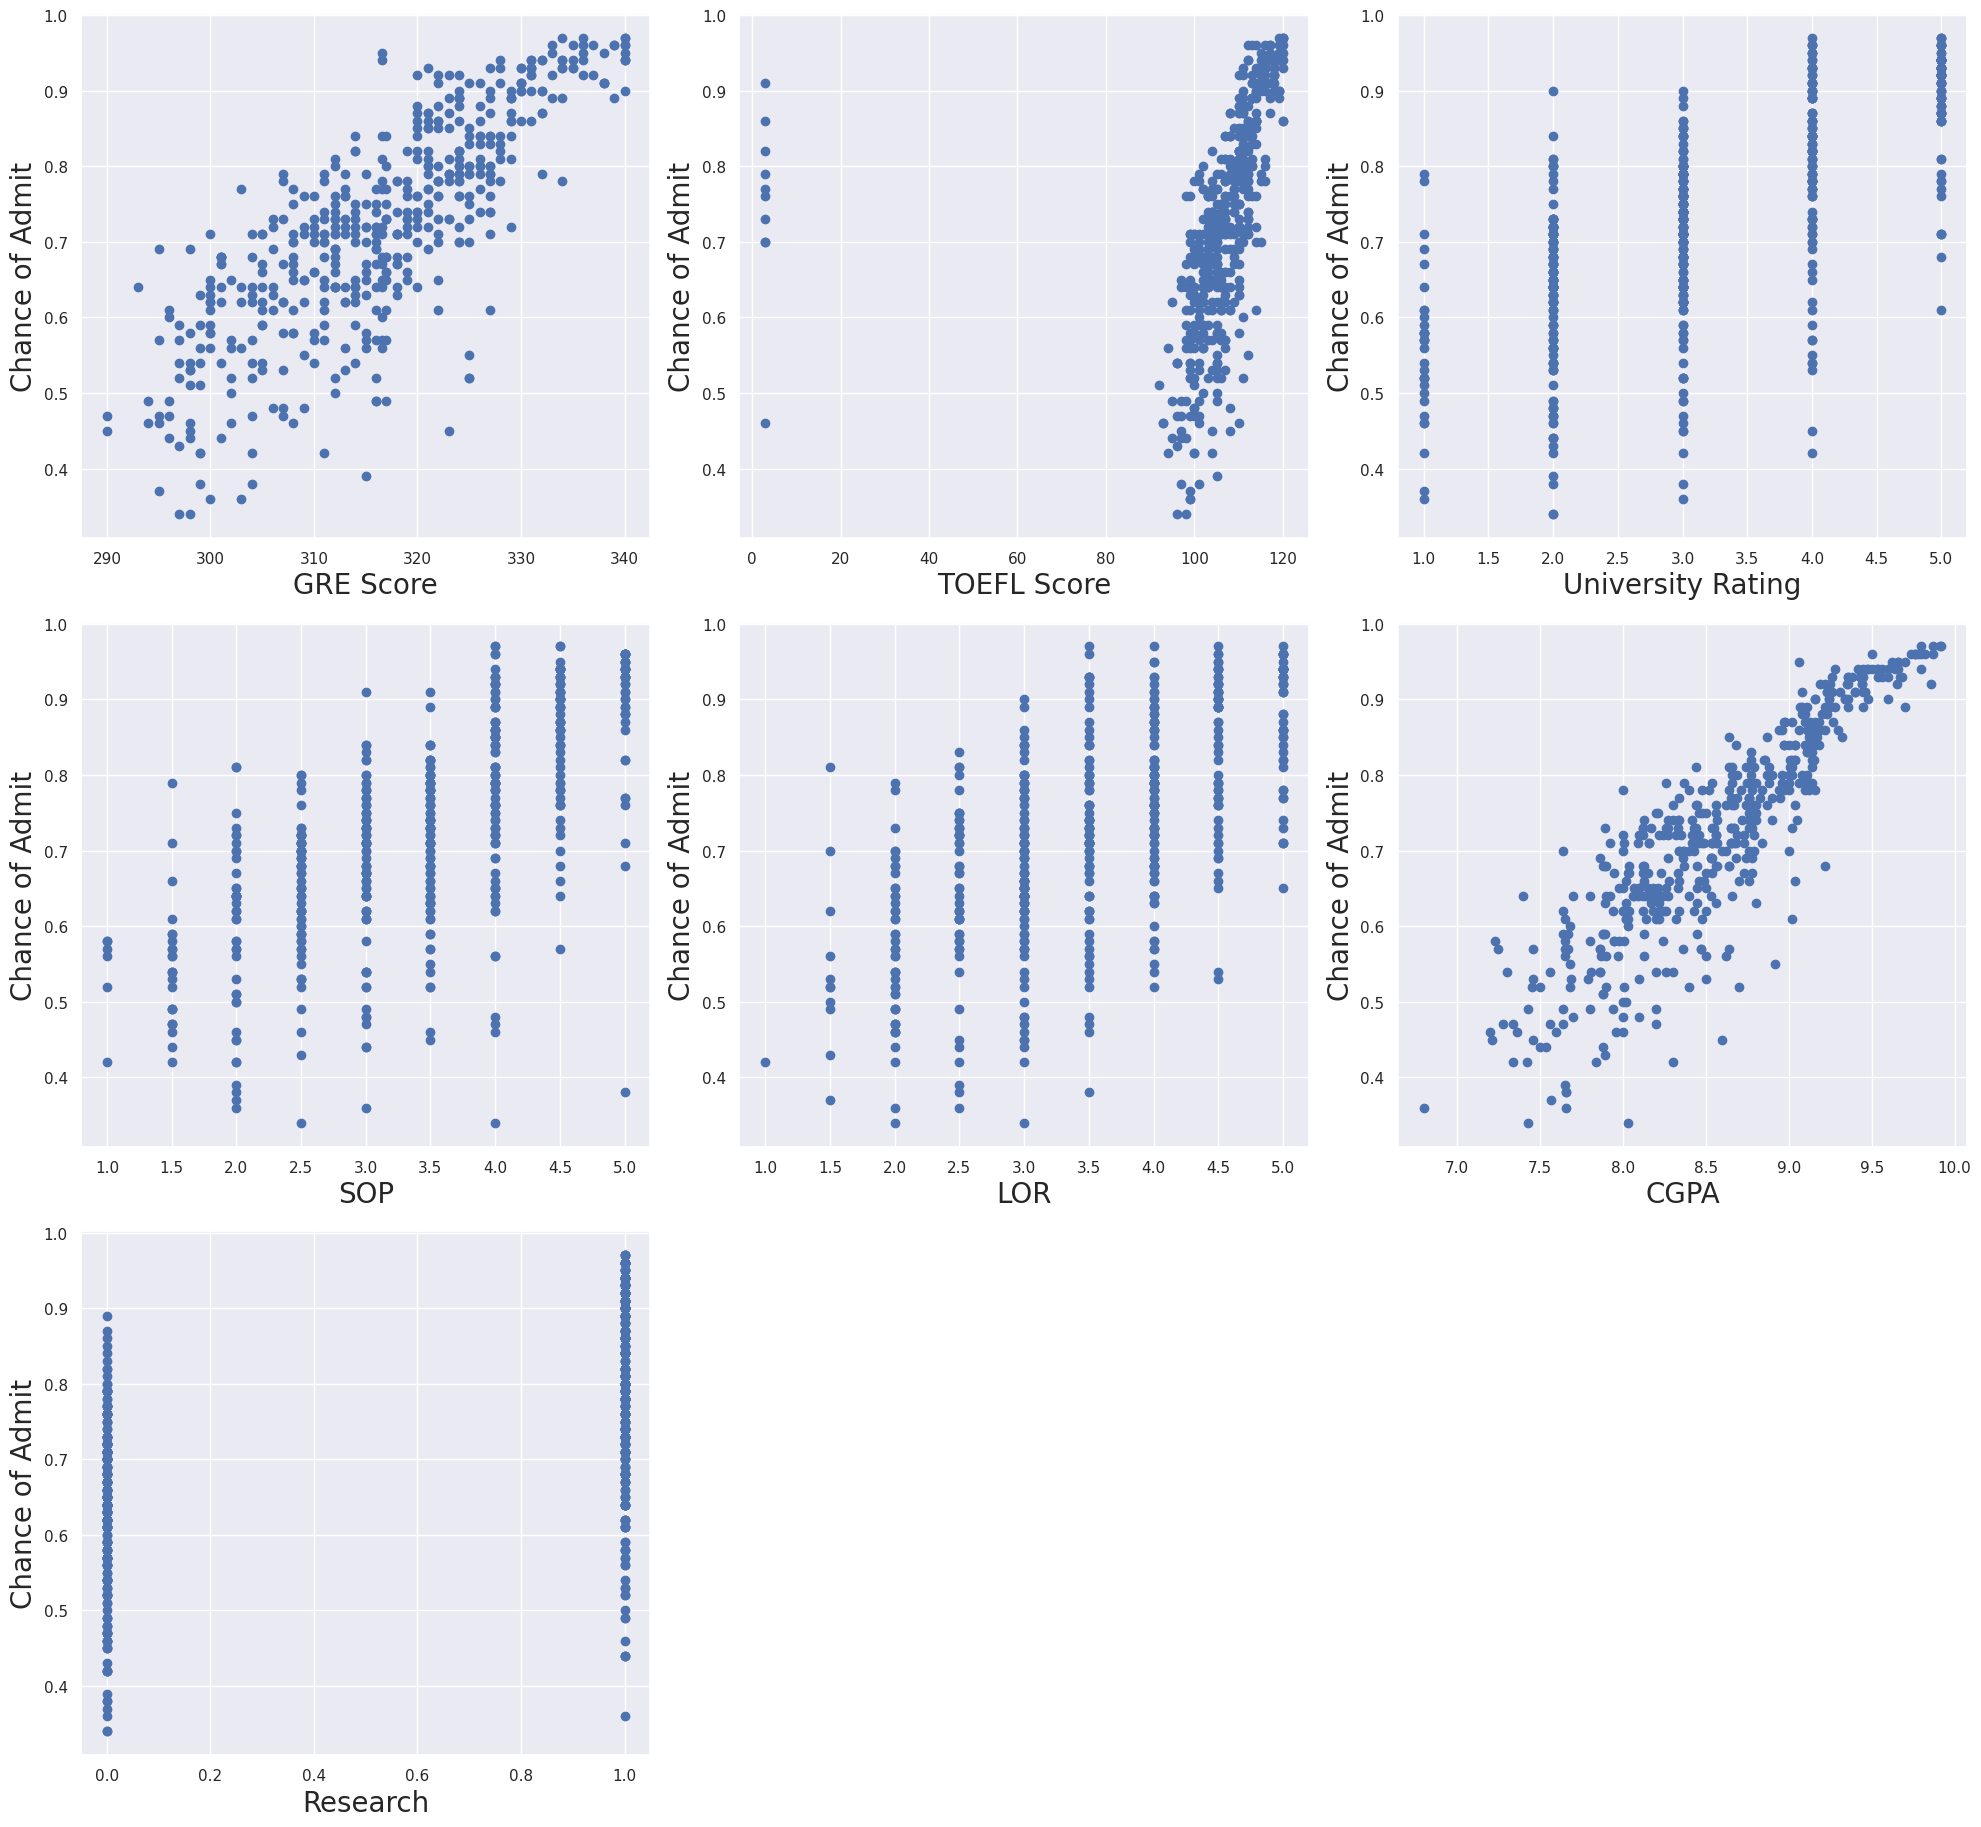

In [65]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15:

        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled 
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [69]:
vif

,VIF,Features
0,3.376381,GRE Score
1,1.135871,TOEFL Score
2,2.492362,University Rating
3,2.745390,SOP
4,2.045505,LOR
5,4.298661,CGPA
6,1.459020,Research


In [70]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [71]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [72]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [74]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [77]:
#  prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

/config/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.92012451])

In [78]:
regression.score(x_train,y_train)

0.840020802904783

In [79]:
adj_r2(x_train,y_train)

0.8369694285732666

In [80]:
regression.score(x_test,y_test)

0.7448088767175549

In [81]:
adj_r2(x_test,y_test)

0.7295410317348445

In [87]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [88]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0013710281304524117

In [89]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0013710281304524117)

In [90]:
lasso_reg.score(x_test, y_test)

0.7438020072403424

In [92]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([6.01923873, 4.52468842, 5.13363989, 5.94037317, 6.55681113,
       2.52745481, 2.79363333, 2.98308956, 5.68788387, 4.60523232,
       9.93283921, 3.12738231, 4.8323466 , 3.0117491 , 2.47174692,
       4.33157898, 3.45174763, 1.57123754, 1.26973613, 9.01293286,
       8.04010682, 0.55295738, 7.02965329, 1.24323264, 2.35662253,
       5.65657833, 2.99513982, 0.58906982, 0.66978715, 8.17275966,
       8.69972368, 7.77617186, 3.53617706, 8.19660595, 1.84914866,
       8.02174896, 5.9100508 , 2.88582153, 6.70092477, 9.0715392 ,
       2.24938286, 0.13181739, 8.97374905, 7.54723738, 2.41799054,
       9.74959797, 9.41538244, 9.6610645 , 9.44207615, 0.42864212]),
        cv=10)

In [93]:
ridgecv.alpha_

9.932839211699836

In [94]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=9.932839211699836)

In [95]:
ridge_model.score(x_test,y_test)

0.7475922817724259

In [96]:
# elastic net

elasticCV = ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [97]:
elasticCV.alpha_

0.002742056260904824

In [98]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [99]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.002742056260904824)

In [100]:
elasticnet_reg.score(x_test, y_test)

0.7439874815841272

In [101]:
## Polynomial Regression
dataset= pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [102]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [103]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

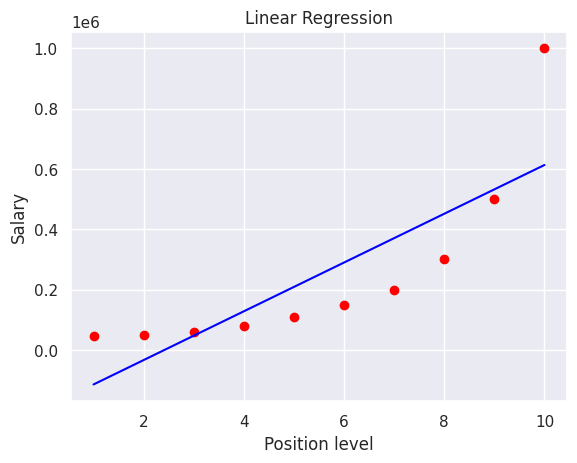

In [105]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly,y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [108]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

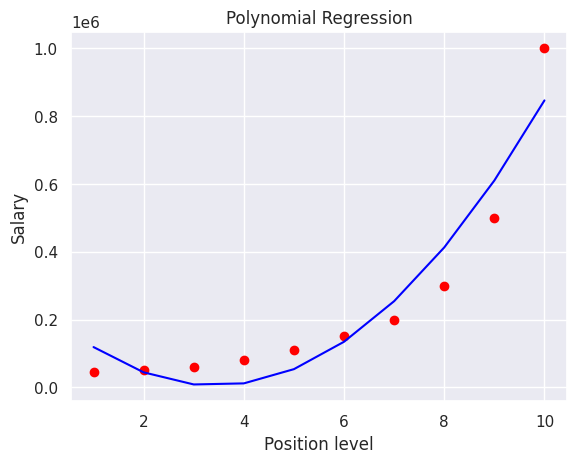

In [109]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [110]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression()

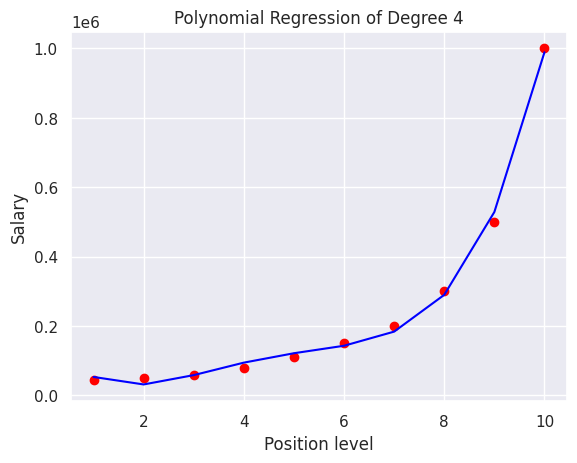

In [111]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()